# **1. Import Library**

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from skopt import BayesSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

In [80]:
clustered_df = pd.read_csv(r'C:\Users\Dell\Desktop\DICODING\Python\proyek_ml\bank_clustered.csv')
clustered_df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,15.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,0
1,377.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,0
2,127.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,0
3,185.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,0
4,14.45,Credit,Atlanta,Online,26.0,Student,198.0,1.0,7429.40,0


In [81]:
clustered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Location             2512 non-null   object 
 3   Channel              2512 non-null   object 
 4   CustomerAge          2512 non-null   float64
 5   CustomerOccupation   2512 non-null   object 
 6   TransactionDuration  2512 non-null   float64
 7   LoginAttempts        2512 non-null   float64
 8   AccountBalance       2512 non-null   float64
 9   Cluster              2512 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 196.4+ KB


# **3. Data Splitting**

In [82]:
# Memisahkan Cluster dari Dataset untuk menjadi target
X = clustered_df.drop(columns=['Cluster'], axis=1)
y = clustered_df['Cluster']

In [83]:
# Standarisasi
fitur_num = X.select_dtypes(include=['number']).columns

scaler = StandardScaler()
X[fitur_num] = scaler.fit_transform(X[fitur_num])

#Encoding
fitur_kat = X.select_dtypes(include=['object']).columns

le = LabelEncoder()
for column in fitur_kat:
    X[column] = le.fit_transform(X[column])

X.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589


In [84]:
# Data Splitting
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2009, 9), y_train=(2009,)
Test set shape: X_test=(503, 9), y_test=(503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [85]:
# Pelatihan Model
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
 
print("Model training selesai.")

Model training selesai.


Algoritma yang digunakan:
- **K-Nearest Neighbors (KNN):** algoritma supervised learning yang dapat digunakan untuk klasifikasi dan regresi. Metode ini melakukan klasifikasi data berdasarkan kedekatannya dengan data lain yang sudah diberi label. Data baru diklasifikasikan ke dalam kelas yang paling umum di antara tetangga terdekatnya.
- **Random Forest:** algoritma lanjutan dari Decision Tree yang menggunakan banyak pohon keputusan untuk meningkatkan akurasi prediksi. Algoritma ini menggabungkan hasil beberapa pohon keputusan yang dibangun dari sampel acak dataset sehingga mengurangi risiko overfitting dan memberikan hasil lebih stabil.

## **b. Evaluasi Model Klasifikasi**

### **Evaluasi Model dengan Data Uji**

In [86]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results
    
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
 
# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test)
}
 
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
 
# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })
 
# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)
 
# Tampilkan DataFrame
print(summary_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN)  0.996024   0.996028  0.996024  0.995934
1         Random Forest (RF)  1.000000   1.000000  1.000000  1.000000


### **Confusion Matrix**

In [87]:
# Membuat fungsi untuk confusion matrix

def plot_confusion_matrix(model, X_test, y_test):
    # Prediksi data uji
    y_pred = model.predict(X_test)

    # Buat confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    
    # Tambahkan label
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix {model.__class__.__name__}")

    plt.show()

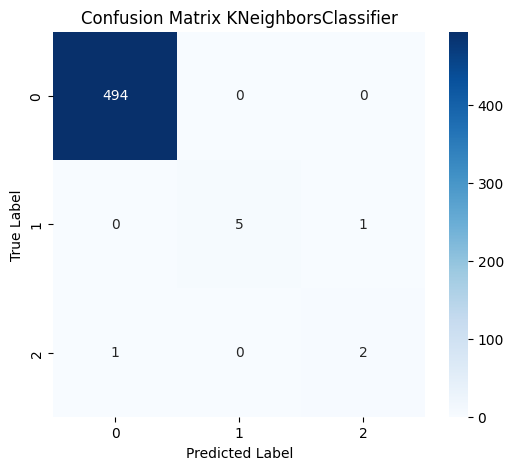

In [88]:
# Confusion Matrix untuk KNN
plot_confusion_matrix(knn, X_test, y_test)

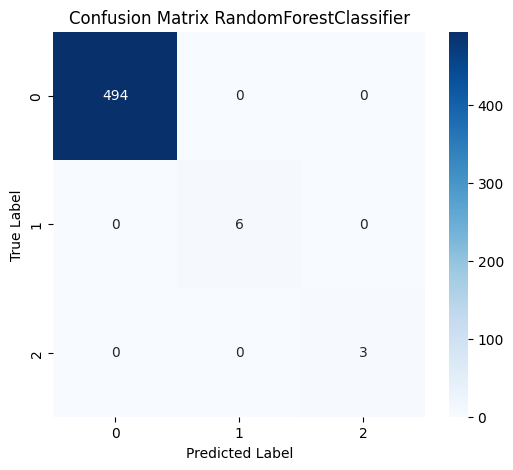

In [89]:
# Confusion Matrix untuk RandomForest
plot_confusion_matrix(rf, X_test, y_test)

Perbandingan algoritma:  
- KNN melakukan 1 kesalahan prediksi, sedangkan RandomForest tidak melakukan kesalahan prediksi
- KNN masih bisa ditingkatkan dengan tuning parameter

## **c. Tuning Model Klasifikasi (Optional)**

### **Tuning model KNN dengan Bayes Optimization**

In [90]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'n_neighbors': (1, 20),  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']
}
 
# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=knn, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_
 
# Evaluasi performa model pada test set
bayes_search_score = best_rf_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}") 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

C:\Users\Dell\.virtualenvs\proyek_analisis_data-4CKVh0Td\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('manhattan'), np.int64(1), np.str_('distance')] before, using random point ['euclidean', np.int64(13), 'distance']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters (Bayesian Optimization): OrderedDict({'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'})
Accuracy after Bayesian Optimization: 1.00


### **Tuning model RandomForest dengan Bayes Optimization**

In [91]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (10, 50),
    'min_samples_split': (2, 10),
    'criterion': ['gini', 'entropy']
}
 
# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_
 
# Evaluasi performa model pada test set
bayes_search_score = best_rf_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}") 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [92]:
# Model setelah tuning
knn_tuned = KNeighborsClassifier(metric='euclidean', n_neighbors=4, weights='uniform')
knn_tuned.fit(X_train, y_train)

rf_tuned = RandomForestClassifier(criterion='gini', max_depth=39, min_samples_split=9, n_estimators=226)
rf_tuned.fit(X_train, y_train)


print("Model training selesai.")

Model training selesai.


In [93]:
# Mengevaluasi setiap model 
results = {
    'K-Nearest Neighbors': evaluate_model(knn, X_test, y_test),
    'K-Nearest Neighbors Tuned': evaluate_model(knn_tuned, X_test, y_test),
    'Random Forest': evaluate_model(rf, X_test, y_test),
    'Random Forest Tuned': evaluate_model(rf_tuned, X_test, y_test)
}

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors,0.996024,0.996028,0.996024,0.995934
1,K-Nearest Neighbors Tuned,0.998012,0.998016,0.998012,0.997814
2,Random Forest,1.000000,1.000000,1.000000,1.000000
3,Random Forest Tuned,1.000000,1.000000,1.000000,1.000000


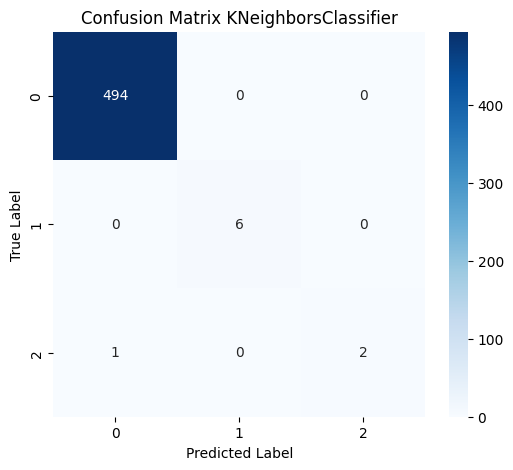

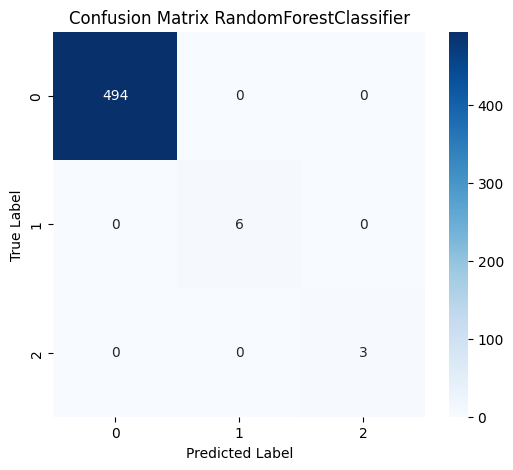

In [94]:
plot_confusion_matrix(knn_tuned, X_test, y_test)
plot_confusion_matrix(rf_tuned, X_test, y_test)

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [95]:
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors,0.996024,0.996028,0.996024,0.995934
1,K-Nearest Neighbors Tuned,0.998012,0.998016,0.998012,0.997814
2,Random Forest,1.000000,1.000000,1.000000,1.000000
3,Random Forest Tuned,1.000000,1.000000,1.000000,1.000000


1. Perbandingan hasil sebelum dan setelah tuning
   - Pada model KNN terjadi peningkatan akurasi setelah tuning
   - Pada model Random Forest tidak ada perubahan sesudah tuning, dikarenakan akurasi sudah sempurna
2. Identifikasi kelemahan model
    - Pada model KNN masih terdapat kesalahan prediksi, namun setelah dilakukan tuning akurasi meningkat menjadi 0.998 yang menunjukkan sebenarnya model awal sudah baik namun dengan tuning model dapat ditingkatkan lagi
    - Pada model Random Forest menunjukkan akurasi, presisi, recall, dan F1-Score sempurna dan kemungkinan terjadi overfitting karena kebocoran data
3. Rekomendasi tindakan lanjutan
   - Overfitting dapat diatasi dengan berbagai teknik, yaitu Cross-Validation, Early Stopping, Regularisasi, Dropout, Data Augmentation, atau Pruning